### Import Libraries

In [1]:
import os
import pandas as pd
import cv2
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV,cross_val_score
import matplotlib.pyplot as plt
from PIL import  Image

from sklearn.svm import SVC, LinearSVC
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score
from tensorflow.keras import backend as K
import tensorflow as tf

### Define File Path

In [2]:
file_path = ('C:\\Users\\Venkat Karthi\\PGP AIML\\Computer Vision - 7\\Part3\\105_classes_pins_dataset')

In [3]:
categories= []
for cat in os.listdir(file_path):
    categories.append(cat)

In [4]:
len(categories)

105

In [5]:
#This function will read the images one by one from folder and append them to X_1 array and its label index to Y_1. celeb_list contains the label index and cleebrity name
def splitImagesLabelsIndices1():
    X_1=[]
    y_1= []

    celeb_list=[]
    celeb_dict = {}
    curr_y = 0
    category_images=[]
    label =0
    # we load every alphabet seperately so we can isolate them later
    for celeb_pin in os.listdir(file_path):
      
        #print("loading alphabet: " + alphabet)
        celeb_dict[celeb_pin] = [curr_y,None]
        celeb_path = os.path.join(file_path,celeb_pin)

        # every letter/category has it's own column in the array, so  load seperately

        #  letter_path = os.path.join(alphabet_path, alphabet)

        # read all the images in the current category
        for filename in os.listdir(celeb_path):
          
            # print(filename)
            image_path = os.path.join(celeb_path, filename)
            image = cv2.imread(image_path)
            #image=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
            image = cv2.resize(image,(128,128),interpolation=cv2.INTER_AREA)
            #image = image.reshape(1,128,128,1)
            category_images.append(image)
            celeb_dict[celeb_pin][1] = curr_y 



            curr_y += 1
            y_1.append(label)
        celeb_list.append([label,celeb_pin])
        label=label+1
      

  #cat_list.append(cat_dict)
      #print(curr_y)
      #print(label)
      
        
    y_1 = np.vstack(y_1)
    X_1 = np.stack(category_images)
    return X_1,y_1,celeb_list

In [6]:
X_1=[]
y_1= []
cat_list=[]
X_1,y_1,cat_list= splitImagesLabelsIndices1()

In [7]:
#This function converts celeb_list to dictionary to map index to its cleberity name.
def mapListToDictionary(cat_list):
    celeb_dict={}
    for ind, cleb in (cat_list):

        celeb_dict[ind] =cleb.split("pins_")[1]
    return celeb_dict

  

In [8]:
celeb_dict={}
celeb_dict= mapListToDictionary(cat_list)

In [9]:
#Dictionary looks like this
celeb_dict

{0: 'Adriana Lima',
 1: 'Alex Lawther',
 2: 'Alexandra Daddario',
 3: 'Alvaro Morte',
 4: 'alycia dabnem carey',
 5: 'Amanda Crew',
 6: 'amber heard',
 7: 'Andy Samberg',
 8: 'Anne Hathaway',
 9: 'Anthony Mackie',
 10: 'Avril Lavigne',
 11: 'barack obama',
 12: 'barbara palvin',
 13: 'Ben Affleck',
 14: 'Bill Gates',
 15: 'Bobby Morley',
 16: 'Brenton Thwaites',
 17: 'Brian J. Smith',
 18: 'Brie Larson',
 19: 'camila mendes',
 20: 'Chris Evans',
 21: 'Chris Hemsworth',
 22: 'Chris Pratt',
 23: 'Christian Bale',
 24: 'Cristiano Ronaldo',
 25: 'Danielle Panabaker',
 26: 'Dominic Purcell',
 27: 'Dwayne Johnson',
 28: 'Eliza Taylor',
 29: 'Elizabeth Lail',
 30: 'elizabeth olsen',
 31: 'ellen page',
 32: 'elon musk',
 33: 'Emilia Clarke',
 34: 'Emma Stone',
 35: 'Emma Watson',
 36: 'gal gadot',
 37: 'grant gustin',
 38: 'Gwyneth Paltrow',
 39: 'Henry Cavil',
 40: 'Hugh Jackman',
 41: 'Inbar Lavi',
 42: 'Irina Shayk',
 43: 'Jake Mcdorman',
 44: 'Jason Momoa',
 45: 'jeff bezos',
 46: 'Jennife

In [10]:
#This function craetes positive-positive pair and positive-negative pair.
def createPosNegPairForSNN(X_1,y_1):
    pairImages=[]
    #pairImagesNeg= []
    pairLabels=[]
    idxs=[]


    numClasses = len(np.unique(y_1))
    idx = [np.where(y_1 == i)[0] for i in range(0, numClasses)]
    #numClasses = len(np.unique(y_1))
    #for i in range(0, numClasses):
    # idxs = np.where(y_1 == i)


    for idxA in range(len(X_1)):

        currentImage = X_1[idxA]
        label = y_1[idxA]
        label1=label[0]
        #print(label1)
        #print(idx[y_1])

        #Positive pair of Images
        idxB = np.random.choice(idx[label1])
        posImage = X_1[idxB]
        pairImages.append([currentImage, posImage])
        pairLabels.append([1])


        negIdx = np.where(y_1 != label1)[0]
        negImage = X_1[np.random.choice(negIdx)]
          # prepare a negative pair of images and update our lists
        pairImages.append([currentImage, negImage])
        pairLabels.append([0])

    #print("{}: {} {}".format(i, len(idxs), idxs))
    return np.array(pairImages),np.array(pairLabels)

In [11]:
Xtrain,Xtest,ytrain,ytest=train_test_split(X_1,y_1,test_size=0.30)

In [12]:
pairImages_train,pairLabels_train = createPosNegPairForSNN(Xtrain,ytrain)


In [13]:
pairImages_test,pairLabels_test =createPosNegPairForSNN(Xtest,ytest)

### Display images

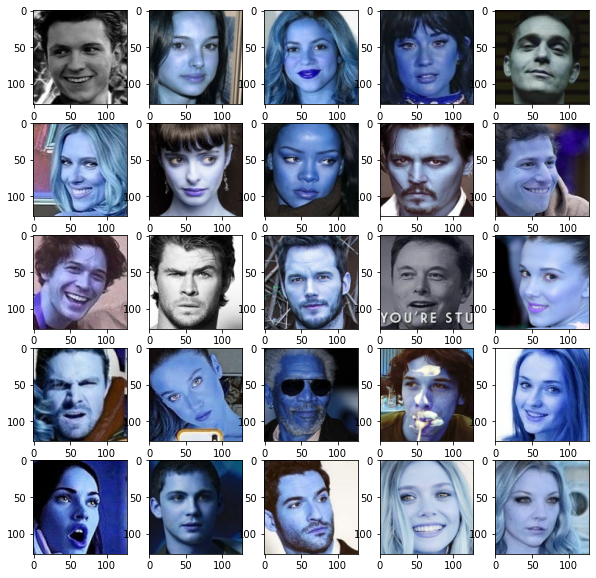

In [14]:
plt.figure(figsize=(10,10)) # specifying the overall grid size

for i in range(25):
    plt.subplot(5,5,i+1)    # the number of images in the grid is 5*5 (25)
    plt.imshow(pairImages_test[i][0])
    plt.imshow(pairImages_test[i][1])
plt.show()

Similarity label : [1]


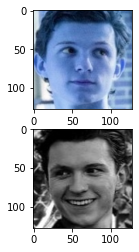

Similarity label : [0]


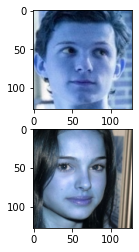

Similarity label : [1]


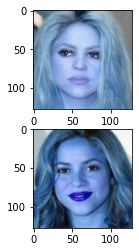

Similarity label : [0]


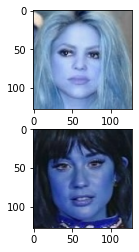

Similarity label : [1]


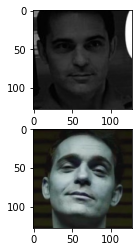

Similarity label : [0]


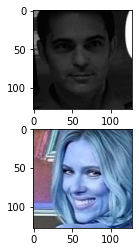

Similarity label : [1]


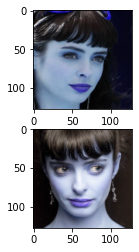

Similarity label : [0]


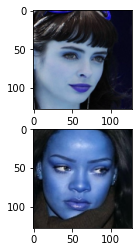

Similarity label : [1]


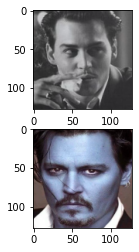

Similarity label : [0]


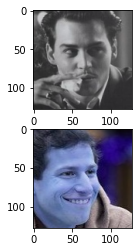

In [15]:
for i in range(10):
    print("Similarity label :",pairLabels_train[i])
    plt.figure(1)
    plt.subplot(211)
    plt.imshow(pairImages_test[i][0])

    plt.subplot(212)
    plt.imshow(pairImages_test[i][1])
    plt.show()

 

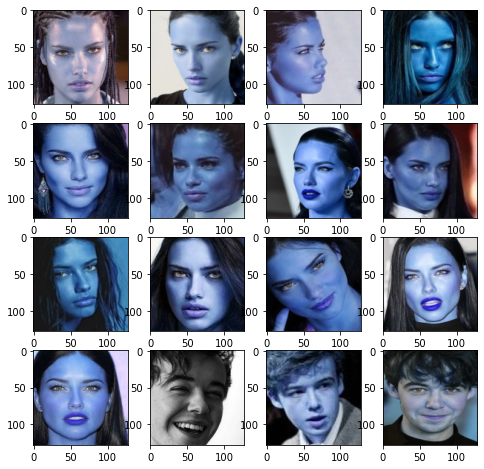

In [16]:
plt.figure(figsize=(8, 8))
k =200
for i in range(0,4):
    for j in range(0,4):
        image = Image.fromarray(X_1[k])
        plt.subplot2grid((4,4),(i,j))
        plt.imshow(image)
        k = k+1
# show the plot
plt.show()

In [17]:
print("Xtrain shape: ",pairImages_train.shape)
print("ytrain shape: ",pairLabels_train.shape)
print("Xtest shape: ",pairImages_test.shape)
print("ytest shape: ",pairLabels_test.shape)

Xtrain shape:  (24546, 2, 128, 128, 3)
ytrain shape:  (24546, 1)
Xtest shape:  (10522, 2, 128, 128, 3)
ytest shape:  (10522, 1)


In [18]:
#Create base model and Siamese model. Base model will return VGG model and model with final layer added on base model.
def baseModel(IMAGE_WIDTH,IMAGE_HEIGHT):
    left_input = Input((IMAGE_WIDTH,IMAGE_HEIGHT,3))
    right_input = Input((IMAGE_WIDTH,IMAGE_HEIGHT,3))
    vgg_model=VGG16(include_top=False,input_shape=(IMAGE_WIDTH,IMAGE_HEIGHT,3),weights='imagenet')
    for layer in vgg_model.layers:
        layer.trainable=False
    x = vgg_model.output
    #print(x)
    x = Flatten()(x)
    x = Dense(4096, activation='relu')(x)
    model = Model(vgg_model.input,x)
    return model,left_input,right_input,vgg_model

def createSiameseModel(IMAGE_WIDTH,IMAGE_HEIGHT):
    model,left_input,right_input,vgg_model = baseModel(IMAGE_WIDTH,IMAGE_HEIGHT)
    enocode_left = model(left_input)
    encode_right=model(right_input)
    L1_layer = Lambda(lambda tensors:K.abs(tensors[0] - tensors[1]))
    L1_distance = L1_layer([enocode_left, encode_right])
    prediction = Dense(1,activation='sigmoid')(L1_distance)
    siamese_net = Model(inputs=[left_input,right_input],outputs=prediction)
    return siamese_net



In [19]:
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense, Conv2D, BatchNormalization, Dropout,MaxPooling2D,Lambda,Input,Flatten
from tensorflow.keras.optimizers import Adam,SGD,RMSprop
from tensorflow.keras.applications import VGG19,VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

In [20]:
embeddingModel ,left,right,vgg_model= baseModel(128,128)

In [21]:
vgg_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0     

In [22]:
#We will predict the values of X_1 using VGG model, thus giving us embedding vectors of images in X_1.
def generateEmbeddingVector(X_1):

    vgg_feature=[]
    for i in range(len(X_1)):
        input_Image=  Input((128,128,3))

        img = Image.fromarray(X_1[i])
        img =cv2.cvtColor(np.array(img),cv2.COLOR_RGB2BGR)
        img_data = np.expand_dims(img, axis=0)
        img=img.reshape(1,128,128,3)
        img_data=preprocess_input(img)
        feat_predict= vgg_model.predict(img_data)
        vgg16_feature_np = np.array(feat_predict)
        vgg_feature.append(vgg16_feature_np.flatten())
   

    return np.array(vgg_feature)

In [24]:
vgg_feature=[]
vgg_feature=generateEmbeddingVector(X_1)

In [25]:
vgg_feature.shape

(17534, 8192)

In [30]:
vgg_feature_load = np.load('embeddingPrediction.npz.npy',allow_pickle=True)

In [28]:
np.save('embeddingPrediction.npz',vgg_feature)

In [31]:
def euclid_dis(x,y):
    sum_square = K.sum(K.square(x-y))
    
    return K.sqrt(sum_square)

In [32]:
numClasses = len(np.unique(y_1))
idx = [np.where(y_1 == i)[0] for i in range(0, numClasses)]

Index 1 :  5000
Label of 1: [30]
Image 1: 



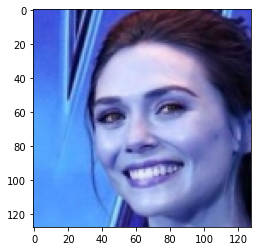

Index 2 :  17533
Label of 2: [104]
Image 2 



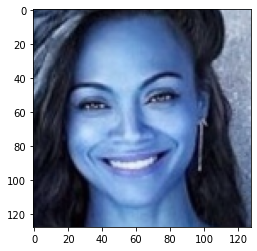

In [33]:
rndInd = np.random.choice([1000,5000])
print("Index 1 : ",rndInd)
print("Label of 1:",y_1[rndInd])
print("Image 1: \n")
posImage = X_1[rndInd]
plt.imshow(posImage)
plt.show()



rndInd2 = np.random.choice([0,len(X_1)-1])
print("Index 2 : ",rndInd2)
print("Label of 2:",y_1[rndInd2])
print("Image 2 \n")
posImage2 = X_1[rndInd2]
plt.imshow(posImage2)
plt.show()


In [36]:
scalerMinMax=MinMaxScaler()
scalerMinMax.fit(vgg_feature)
vgg_feature_scaled= scalerMinMax.transform(vgg_feature)
vgg_feature_scaled.max()

1.0

In [40]:
#Get any images and check the distance between them
ind1=7753
ind2=7754
ImageA = vgg_feature_scaled[ind1]
ImageB=vgg_feature_scaled[ind2]
label =y_1[ind1]
print("Celebrity 1 name : ",celeb_dict[label[0]])

label2 =y_1[ind2]
print("Celebrity 2 name : ",celeb_dict[label2[0]])

distance = euclid_dis(vgg_feature_scaled[ind1],vgg_feature_scaled[ind2])
print(distance)

Celebrity 1 name :  Jennifer Lawrence
Celebrity 2 name :  Jennifer Lawrence
tf.Tensor(6.537862, shape=(), dtype=float32)


In [41]:
#Distance between images of different celebrity
ind1=3039
ind2=6000
ImageC = vgg_feature_scaled[ind1]
ImageD=vgg_feature_scaled[ind2]

label1 =y_1[ind1]
print("Celebrity 1 name : ",celeb_dict[label1[0]])

label2 =y_1[ind2]
print("Celebrity 2 name : ",celeb_dict[label2[0]]) 

distance = euclid_dis(vgg_feature_scaled[ind1],vgg_feature_scaled[ind2])
print(distance)

Celebrity 1 name :  Brie Larson
Celebrity 2 name :  gal gadot
tf.Tensor(4.6887903, shape=(), dtype=float32)


In [42]:
#scaling before PCA
scale=StandardScaler()
scale_X= scale.fit_transform(vgg_feature.reshape(len(X_1),vgg_feature.shape[1]))

In [43]:
scale=StandardScaler()
scale_X= scale.fit_transform(vgg_feature_load.reshape(len(X_1),vgg_feature_load.shape[1]))

In [44]:
scale_X.max()

132.41223

In [45]:
pca = PCA(n_components=2500)
vgg_feature_pca= pca.fit_transform(scale_X)


In [46]:
vgg_feature_pca.shape

(17534, 2500)

In [47]:
trainXSVM,testXSVM,trainYSVM,testYSVM= train_test_split(vgg_feature_pca,y_1,test_size=0.30)

In [48]:
print("Xtrain shape: ",trainXSVM.shape)
print("ytrain shape: ",trainYSVM.shape)
print("Xtest shape: ",testXSVM.shape)
print("ytest shape: ",testYSVM.shape)

Xtrain shape:  (12273, 2500)
ytrain shape:  (12273, 1)
Xtest shape:  (5261, 2500)
ytest shape:  (5261, 1)


In [49]:
#svm=SVC(C=1000,kernel='linear',gamma=1e-4,decision_function_shape='ovo')
linearsvc=SVC(C=100,decision_function_shape='ovo',kernel='linear',gamma=1e-4)

In [50]:
linearsvc.fit(trainXSVM,trainYSVM.ravel())

SVC(C=100, decision_function_shape='ovo', gamma=0.0001, kernel='linear')

In [51]:
predict=linearsvc.predict(testXSVM)

In [52]:
print("Performance accuracy for model on testing data set :",accuracy_score(testYSVM, predict))

Performance accuracy for model on testing data set : 0.34708230374453525


In [53]:
for i in range(12,22):
    print("\n Actual label of the input {} is {} ".format(i, celeb_dict[testYSVM[i][0]]))
    print("   Predicted label of the input {} is {}".format(i, celeb_dict[predict[i]]))


 Actual label of the input 12 is Ursula Corbero 
   Predicted label of the input 12 is Tuppence Middleton

 Actual label of the input 13 is alycia dabnem carey 
   Predicted label of the input 13 is elizabeth olsen

 Actual label of the input 14 is Robert De Niro 
   Predicted label of the input 14 is Robert De Niro

 Actual label of the input 15 is camila mendes 
   Predicted label of the input 15 is Katherine Langford

 Actual label of the input 16 is Tuppence Middleton 
   Predicted label of the input 16 is Tuppence Middleton

 Actual label of the input 17 is camila mendes 
   Predicted label of the input 17 is camila mendes

 Actual label of the input 18 is Johnny Depp 
   Predicted label of the input 18 is Johnny Depp

 Actual label of the input 19 is Rebecca Ferguson 
   Predicted label of the input 19 is Emma Watson

 Actual label of the input 20 is Stephen Amell 
   Predicted label of the input 20 is Chris Pratt

 Actual label of the input 21 is Elizabeth Lail 
   Predicted la

In [54]:
def contrastive_loss(y_true, y_pred):
  
    margin = 1
    return K.mean(tf.cast(y_true ,tf.float64)* K.square(tf.cast((y_pred),tf.float64) + (1 -tf.cast( y_true,tf.float64)) * K.square(K.maximum(margin - tf.cast(y_pred,tf.float64), 0))))


In [55]:
def accuracy(y_true, y_pred):
    return K.mean(K.equal(y_true, K.cast(y_pred < 0.5, y_true.dtype)))


In [56]:
siamese_model=createSiameseModel(128,128)

In [57]:
rms = SGD(lr=1e-4)
siamese_model.compile(loss=contrastive_loss, optimizer=rms,metrics =[accuracy])

In [61]:
checkpoint = tf.keras.callbacks.ModelCheckpoint('FaceRecognition_Pinterest.h5', #where to save the model
                                                   save_best_only=True, 
                                                   monitor='val_accuracy', 
                                                   mode='max', 
                                                    verbose = 1)

In [66]:
siamese_model.save('FaceRecognition_Model_Pinterest.h5')

In [63]:
pairLabels_train.shape

(24546, 1)

In [64]:
history = siamese_model.fit([pairImages_train[:,0],pairImages_train[:,1]],pairLabels_train ,
                       callbacks = [checkpoint],batch_size=64,verbose=1)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
384/384 [==============================] - ETA: 0s - loss: 0.0521 - accuracy: 0.4974 WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


384/384 [==============================] - 11602s 30s/step - loss: 0.0521 - accuracy: 0.4974


In [65]:
siamese_model.evaluate([pairImages_test[:,0],pairImages_test[:,1]],pairLabels_test)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
329/329 [==============================] - 5744s 17s/step - loss: 0.0035 - accuracy: 0.5001


[0.003476744517683983, 0.500095009803772]